In [4]:
import pandas as pd

loan_data = pd.read_csv('loan.csv')
loan_data_head = loan_data.head(10)
loan_data_info = loan_data.info()
loan_data_head, loan_data_info


C:\Users\iqbal\AppData\Local\Temp\ipykernel_4200\3992598265.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0  1077501    1296599       5000         5000           4975.0   36 months   
 1  1077430    1314167       2500         2500           2500.0   60 months   
 2  1077175    1313524       2400         2400           2400.0   36 months   
 3  1076863    1277178      10000        10000          10000.0   36 months   
 4  1075358    1311748       3000         3000           3000.0   60 months   
 5  1075269    1311441       5000         5000           5000.0   36 months   
 6  1069639    1304742       7000         7000           7000.0   60 months   
 7  1072053    1288686       3000         3000           3000.0   36 months   
 8  1071795    1306957       5600         5600           5600.0   60 months   
 9  1071570    1306721       5375         5375           5350.0   60 months   
 
   int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
 0   10.65%       162.87     B        B2  ...                

In [6]:

data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
data_dictionary_head = data_dictionary.head(10)

data_dictionary_head


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


# Cleaning Data

In [8]:

missing_values = loan_data.isnull().mean().sort_values(ascending=False) * 100
columns_with_missing_data = missing_values[missing_values > 50]

columns_with_missing_data


verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [10]:
# cleaning the data more than 50% missing value

cleaned_loan_data = loan_data.drop(columns=columns_with_missing_data.index)
new_shape = cleaned_loan_data.shape
new_shape


(39717, 54)

In [12]:
cleaned_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Univariate Analysis

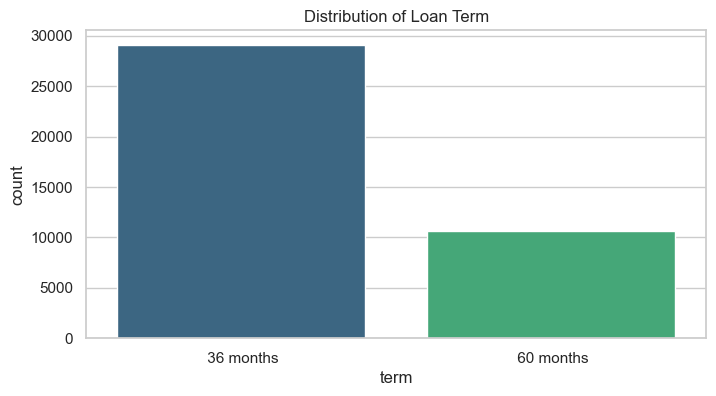

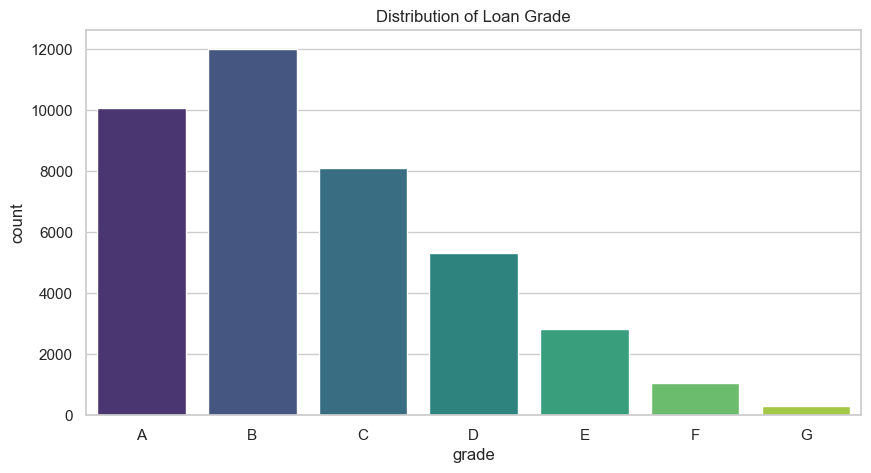

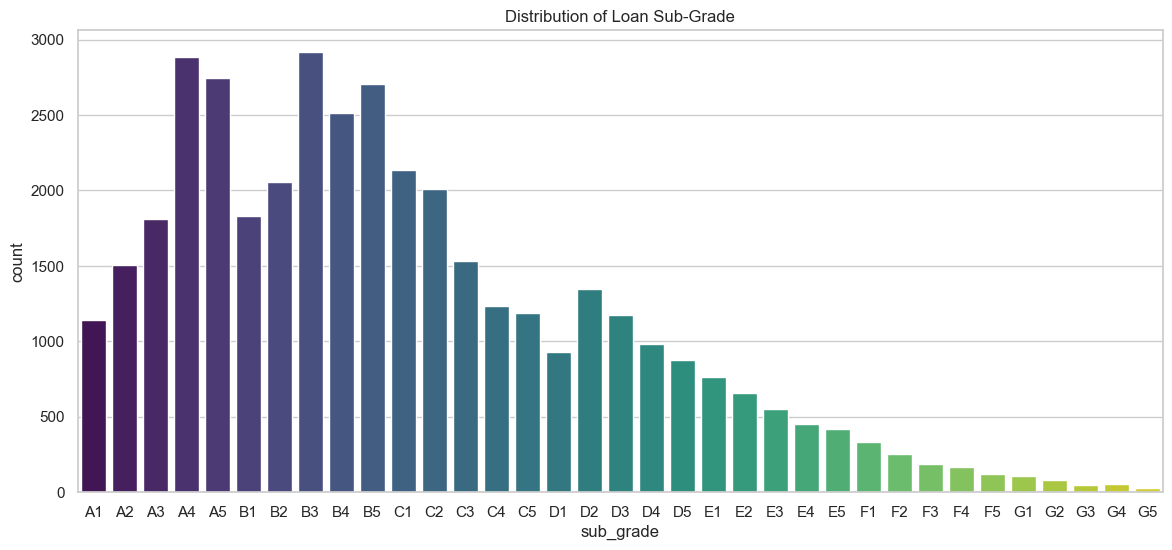

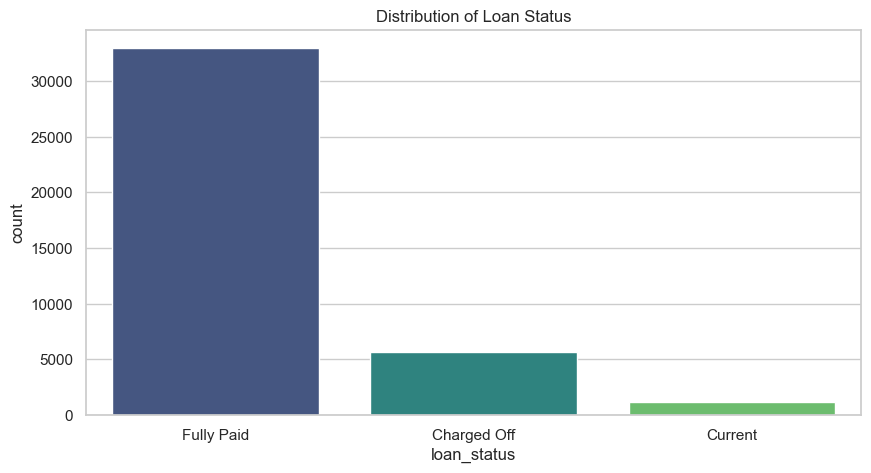

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(8, 4))
sns.countplot(x='term', data=cleaned_loan_data, palette="viridis")
plt.title('Distribution of Loan Term')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='grade', data=cleaned_loan_data, palette="viridis", order=sorted(cleaned_loan_data['grade'].unique()))
plt.title('Distribution of Loan Grade')
plt.show()


plt.figure(figsize=(14, 6))
sns.countplot(x='sub_grade', data=cleaned_loan_data, palette="viridis", order=sorted(cleaned_loan_data['sub_grade'].unique()))
plt.title('Distribution of Loan Sub-Grade')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='loan_status', data=cleaned_loan_data, palette="viridis", order=cleaned_loan_data['loan_status'].value_counts().index)
plt.title('Distribution of Loan Status')
plt.show()


C:\Users\iqbal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


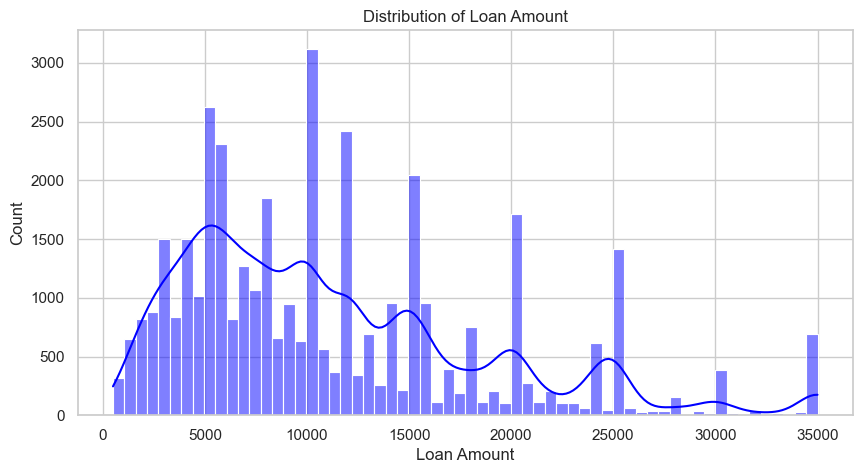

C:\Users\iqbal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


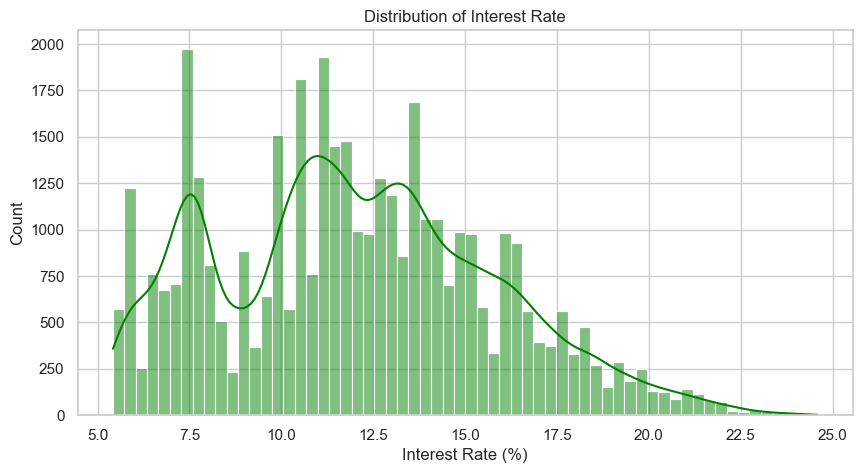

C:\Users\iqbal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


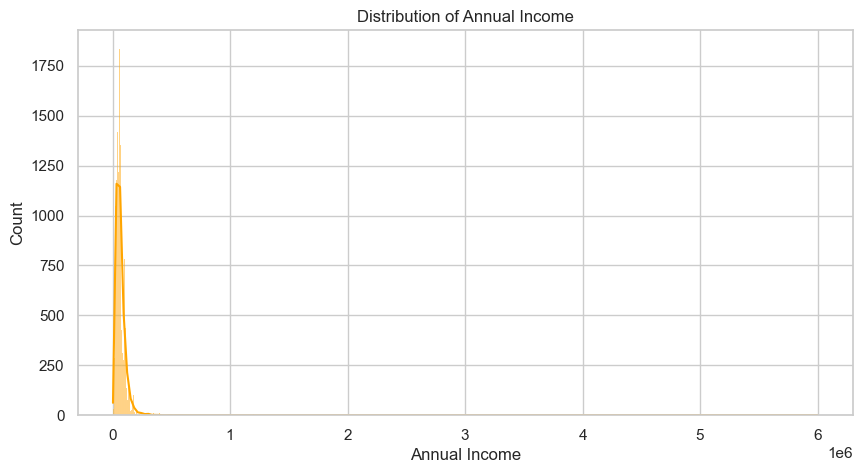

In [16]:

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_loan_data['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


plt.figure(figsize=(10, 5))

cleaned_loan_data['int_rate'] = cleaned_loan_data['int_rate'].str.rstrip('%').astype(float)
sns.histplot(cleaned_loan_data['int_rate'], kde=True, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(cleaned_loan_data['annual_inc'], kde=True, color='orange')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()


# Bivariate Analysis

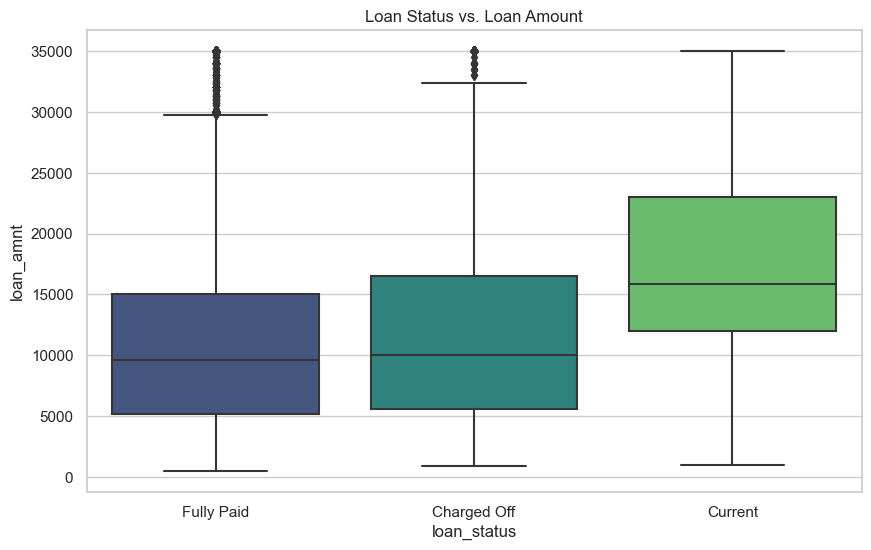

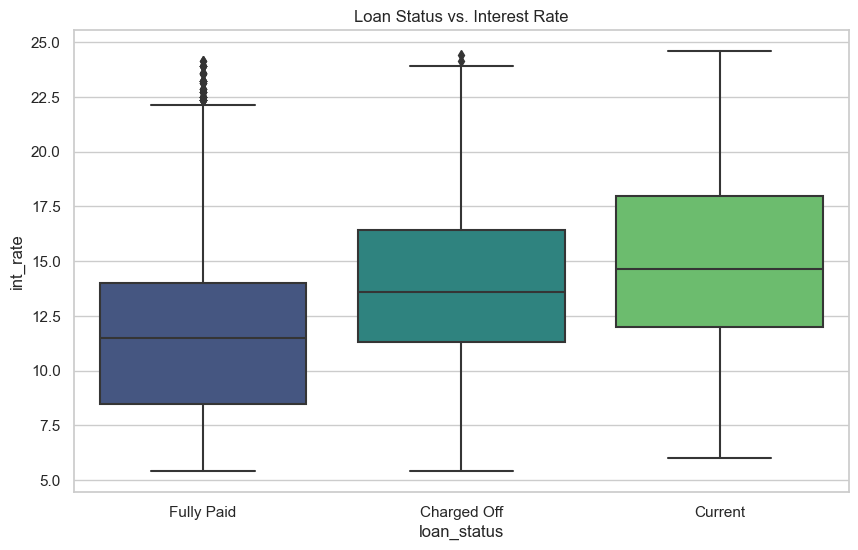

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=cleaned_loan_data, palette="viridis")
plt.title('Loan Status vs. Loan Amount')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=cleaned_loan_data, palette="viridis")
plt.title('Loan Status vs. Interest Rate')
plt.show()


# Multivariate analysis: Loan Term, Grade, and Loan Status

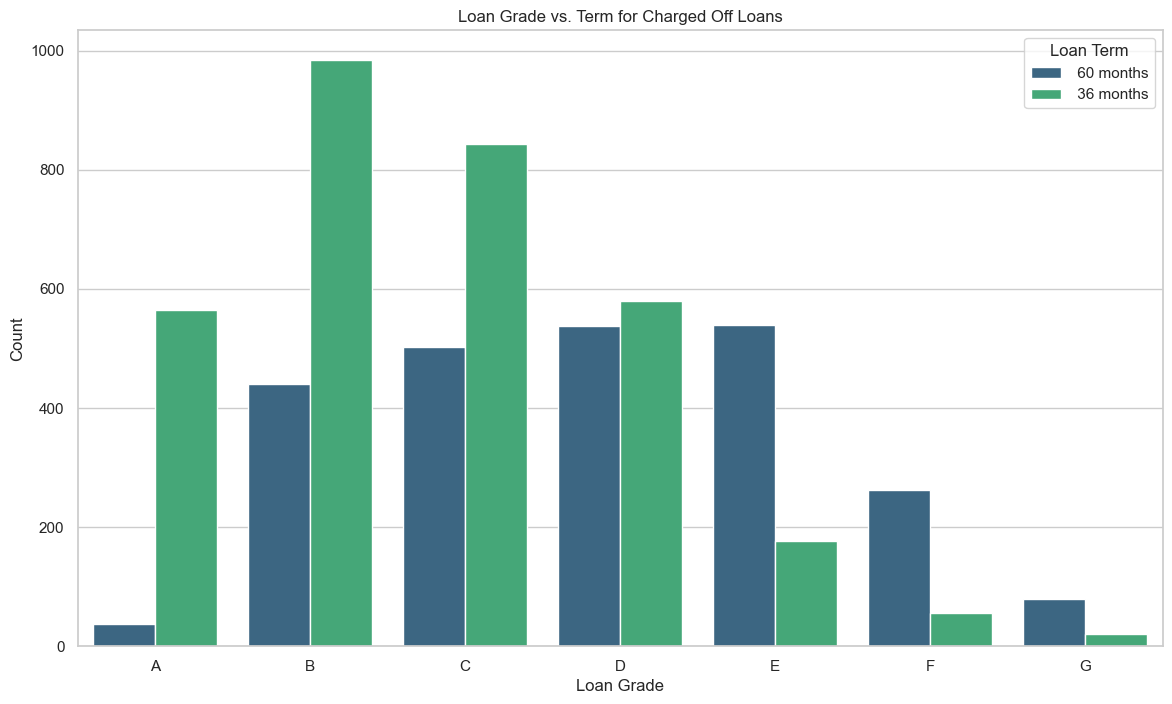

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x='grade', hue='term', data=cleaned_loan_data[cleaned_loan_data['loan_status'] == 'Charged Off'], 
              palette="viridis", order=sorted(cleaned_loan_data['grade'].unique()))
plt.title('Loan Grade vs. Term for Charged Off Loans')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Term', loc='upper right')
plt.show()